In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv('DatasetBalanced.csv')
data=data.loc[:,['O2Sat', 'SBP','DBP','EtCO2','Temp','HR','Resp','PaCO2','SaO2','FiO2','Platelets','Bilirubin_direct','MAP','Creatinine','Age','SepsisLabel']]
data

,O2Sat,SBP,DBP,EtCO2,Temp,HR,Resp,PaCO2,SaO2,FiO2,Platelets,Bilirubin_direct,MAP,Creatinine,Age,SepsisLabel
0,97.228627,122.392746,62.218458,33.385834,37.003726,84.870313,18.754969,41.129295,91.820606,0.559317,197.613414,2.427547,80.578177,1.459667,68.540000,0
1,100.000000,122.392746,62.218458,33.385834,37.003726,65.000000,16.500000,41.129295,91.820606,0.400000,197.613414,2.427547,72.000000,1.459667,68.540000,0
2,100.000000,122.392746,62.218458,33.385834,37.003726,78.000000,18.754969,41.129295,91.820606,0.559317,197.613414,2.427547,42.500000,1.459667,68.540000,0
3,100.000000,122.392746,62.218458,33.385834,37.003726,73.000000,17.000000,41.129295,91.820606,0.559317,197.613414,2.427547,80.578177,1.459667,68.540000,0
4,100.000000,129.000000,69.000000,33.385834,37.003726,70.000000,14.000000,41.129295,91.820606,0.400000,330.000000,2.427547,74.000000,0.800000,68.540000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055529,98.505335,107.163695,43.846975,33.385834,37.206679,59.519585,14.226871,41.129295,91.820606,0.500000,197.613414,2.427547,60.846975,1.459667,51.370000,1
2055530,97.228627,122.392746,62.218458,33.385834,37.003726,84.870313,18.754969,41.129295,91.820606,0.559317,197.613414,2.427547,80.578177,1.459667,76.880000,1
2055531,100.000000,78.717245,62.218458,33.385834,37.003726,76.572415,23.000000,41.129295,91.820606,0.559317,197.613414,2.427547,48.549547,1.459667,38.220000,1
2055532,95.961946,100.404864,61.297568,33.385834,36.375983,91.968813,19.980973,41.129295,91.820606,0.530787,197.613414,2.427547,76.000000,1.459667,43.450000,1


In [3]:
x = data.drop(["SepsisLabel"], axis = 1)
y = data.SepsisLabel.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
results = x_test
results['Actual_Output'] = y_test
results

,O2Sat,SBP,DBP,EtCO2,Temp,HR,Resp,PaCO2,SaO2,FiO2,Platelets,Bilirubin_direct,MAP,Creatinine,Age,Actual_Output
499008,97.000000,113.000000,51.000000,33.385834,37.003726,80.000000,23.000000,41.129295,91.820606,0.559317,197.613414,2.427547,71.000000,1.459667,77.16,0
1006910,99.000000,154.000000,82.000000,33.385834,37.003726,94.000000,12.000000,41.129295,91.820606,0.559317,197.613414,2.427547,103.000000,1.459667,87.00,0
459829,100.000000,138.000000,62.218458,33.385834,37.003726,72.000000,36.000000,41.129295,91.820606,0.559317,197.613414,2.427547,77.000000,1.459667,87.58,0
920753,97.228627,122.392746,62.218458,33.385834,37.003726,84.870313,18.754969,41.129295,91.820606,0.559317,197.613414,2.427547,80.578177,1.459667,78.00,0
375141,100.000000,124.000000,67.000000,33.385834,37.830000,107.000000,14.500000,41.129295,91.820606,0.500000,197.613414,2.427547,88.000000,1.459667,63.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894274,98.000000,238.000000,138.000000,33.385834,37.003726,76.000000,20.000000,41.129295,91.820606,0.559317,197.613414,2.427547,164.000000,1.459667,28.00,0
558601,96.000000,122.392746,62.218458,33.385834,37.003726,48.000000,11.000000,41.129295,91.820606,0.559317,197.613414,2.427547,86.000000,1.459667,73.88,0
863494,96.000000,142.000000,58.000000,33.385834,37.003726,74.000000,22.000000,41.129295,91.820606,0.559317,197.613414,2.427547,88.000000,1.459667,77.00,0
1674463,98.019650,133.983139,71.860610,33.385834,37.003726,63.139693,19.681188,40.521538,91.820606,0.530969,197.613414,2.427547,87.691530,1.585350,82.74,1


In [4]:
temp = list(x_test.Temp)
hr =  list(x_test.HR)
resp =  list(x_test.Resp)
co2 = list(x_test.PaCO2)
FiO2 = list(x_test.FiO2)
SaO2 = list(x_test.SaO2)
Platelets =  list(x_test.Platelets)
Bilirubin_direct =  list(x_test.Bilirubin_direct)
MAP = list(x_test.MAP)
Creatinine = list(x_test.Creatinine)

## SIRS Definition model

In [5]:
output=[]
for i in range(0,len(y_test)):
    tally = 0
    if(temp[i]>38 or temp[i]<36):
        tally +=1
    if(hr[i]>90):
        tally+=1
    if(resp[i]>20):
        tally+=1
    if(co2[i]>32):
        tally+=1
    if(tally>=2):
        output.append(1)
    else:
        output.append(0)

results['SIRS_Output']=output
results

,O2Sat,SBP,DBP,EtCO2,Temp,HR,Resp,PaCO2,SaO2,FiO2,Platelets,Bilirubin_direct,MAP,Creatinine,Age,Actual_Output,SIRS_Output
499008,97.000000,113.000000,51.000000,33.385834,37.003726,80.000000,23.000000,41.129295,91.820606,0.559317,197.613414,2.427547,71.000000,1.459667,77.16,0,1
1006910,99.000000,154.000000,82.000000,33.385834,37.003726,94.000000,12.000000,41.129295,91.820606,0.559317,197.613414,2.427547,103.000000,1.459667,87.00,0,1
459829,100.000000,138.000000,62.218458,33.385834,37.003726,72.000000,36.000000,41.129295,91.820606,0.559317,197.613414,2.427547,77.000000,1.459667,87.58,0,1
920753,97.228627,122.392746,62.218458,33.385834,37.003726,84.870313,18.754969,41.129295,91.820606,0.559317,197.613414,2.427547,80.578177,1.459667,78.00,0,0
375141,100.000000,124.000000,67.000000,33.385834,37.830000,107.000000,14.500000,41.129295,91.820606,0.500000,197.613414,2.427547,88.000000,1.459667,63.34,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894274,98.000000,238.000000,138.000000,33.385834,37.003726,76.000000,20.000000,41.129295,91.820606,0.559317,197.613414,2.427547,164.000000,1.459667,28.00,0,0
558601,96.000000,122.392746,62.218458,33.385834,37.003726,48.000000,11.000000,41.129295,91.820606,0.559317,197.613414,2.427547,86.000000,1.459667,73.88,0,0
863494,96.000000,142.000000,58.000000,33.385834,37.003726,74.000000,22.000000,41.129295,91.820606,0.559317,197.613414,2.427547,88.000000,1.459667,77.00,0,1
1674463,98.019650,133.983139,71.860610,33.385834,37.003726,63.139693,19.681188,40.521538,91.820606,0.530969,197.613414,2.427547,87.691530,1.585350,82.74,1,0


SIRS Definition Results:
              precision    recall  f1-score   support

           0       0.61      0.52      0.56    308427
           1       0.58      0.67      0.62    308234

    accuracy                           0.60    616661
   macro avg       0.60      0.60      0.59    616661
weighted avg       0.60      0.60      0.59    616661



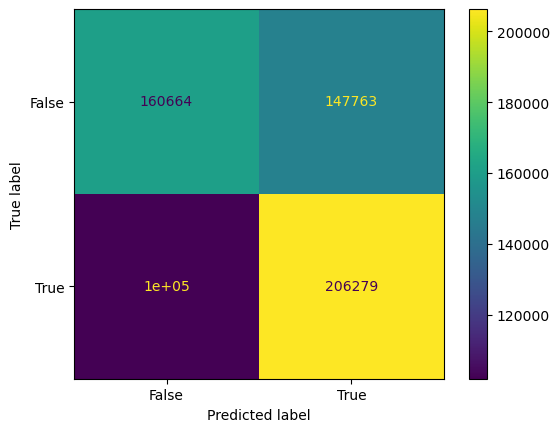

In [6]:
from sklearn import metrics
print("SIRS Definition Results:")
print(metrics.classification_report(results.Actual_Output, results.SIRS_Output))

confusion_matrix = metrics.confusion_matrix(results.Actual_Output, results.SIRS_Output)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Decision Tree

In [7]:
Dtree = DecisionTreeClassifier(criterion = 'entropy')
imp_x_train = x_train.loc[:,['O2Sat', 'SBP','DBP','Temp','HR','Resp','FiO2','Platelets','Bilirubin_direct','Age']]
imp_x_test = x_test.loc[:,['O2Sat', 'SBP','DBP','Temp','HR','Resp','FiO2','Platelets','Bilirubin_direct','Age']]
Dtree.fit(imp_x_train,y_train)
dty_pred = Dtree.predict(imp_x_test)
results['IMP_Decision_Tree_Output'] = dty_pred
results


,O2Sat,SBP,DBP,EtCO2,Temp,HR,Resp,PaCO2,SaO2,FiO2,Platelets,Bilirubin_direct,MAP,Creatinine,Age,Actual_Output,SIRS_Output,IMP_Decision_Tree_Output
499008,97.000000,113.000000,51.000000,33.385834,37.003726,80.000000,23.000000,41.129295,91.820606,0.559317,197.613414,2.427547,71.000000,1.459667,77.16,0,1,0
1006910,99.000000,154.000000,82.000000,33.385834,37.003726,94.000000,12.000000,41.129295,91.820606,0.559317,197.613414,2.427547,103.000000,1.459667,87.00,0,1,0
459829,100.000000,138.000000,62.218458,33.385834,37.003726,72.000000,36.000000,41.129295,91.820606,0.559317,197.613414,2.427547,77.000000,1.459667,87.58,0,1,0
920753,97.228627,122.392746,62.218458,33.385834,37.003726,84.870313,18.754969,41.129295,91.820606,0.559317,197.613414,2.427547,80.578177,1.459667,78.00,0,0,0
375141,100.000000,124.000000,67.000000,33.385834,37.830000,107.000000,14.500000,41.129295,91.820606,0.500000,197.613414,2.427547,88.000000,1.459667,63.34,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894274,98.000000,238.000000,138.000000,33.385834,37.003726,76.000000,20.000000,41.129295,91.820606,0.559317,197.613414,2.427547,164.000000,1.459667,28.00,0,0,0
558601,96.000000,122.392746,62.218458,33.385834,37.003726,48.000000,11.000000,41.129295,91.820606,0.559317,197.613414,2.427547,86.000000,1.459667,73.88,0,0,0
863494,96.000000,142.000000,58.000000,33.385834,37.003726,74.000000,22.000000,41.129295,91.820606,0.559317,197.613414,2.427547,88.000000,1.459667,77.00,0,1,0
1674463,98.019650,133.983139,71.860610,33.385834,37.003726,63.139693,19.681188,40.521538,91.820606,0.530969,197.613414,2.427547,87.691530,1.585350,82.74,1,0,1


              precision    recall  f1-score   support

           0       0.97      0.97      0.97    308427
           1       0.97      0.97      0.97    308234

    accuracy                           0.97    616661
   macro avg       0.97      0.97      0.97    616661
weighted avg       0.97      0.97      0.97    616661



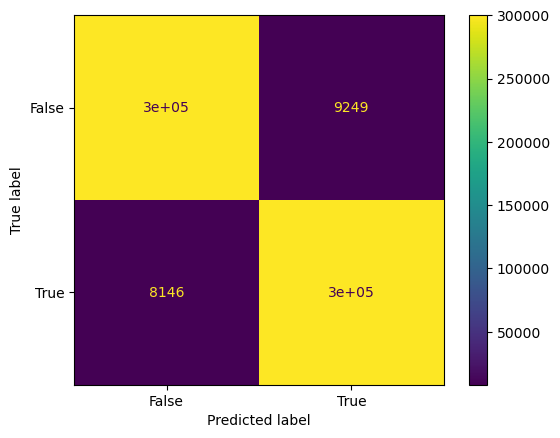

In [8]:
print(metrics.classification_report(results.Actual_Output, results.IMP_Decision_Tree_Output))

confusion_matrix = metrics.confusion_matrix(results.Actual_Output, results.IMP_Decision_Tree_Output)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [9]:
x_test = x_test.drop(["Actual_Output","SIRS_Output","IMP_Decision_Tree_Output"], axis=1)
x_test

,O2Sat,SBP,DBP,EtCO2,Temp,HR,Resp,PaCO2,SaO2,FiO2,Platelets,Bilirubin_direct,MAP,Creatinine,Age
499008,97.000000,113.000000,51.000000,33.385834,37.003726,80.000000,23.000000,41.129295,91.820606,0.559317,197.613414,2.427547,71.000000,1.459667,77.16
1006910,99.000000,154.000000,82.000000,33.385834,37.003726,94.000000,12.000000,41.129295,91.820606,0.559317,197.613414,2.427547,103.000000,1.459667,87.00
459829,100.000000,138.000000,62.218458,33.385834,37.003726,72.000000,36.000000,41.129295,91.820606,0.559317,197.613414,2.427547,77.000000,1.459667,87.58
920753,97.228627,122.392746,62.218458,33.385834,37.003726,84.870313,18.754969,41.129295,91.820606,0.559317,197.613414,2.427547,80.578177,1.459667,78.00
375141,100.000000,124.000000,67.000000,33.385834,37.830000,107.000000,14.500000,41.129295,91.820606,0.500000,197.613414,2.427547,88.000000,1.459667,63.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894274,98.000000,238.000000,138.000000,33.385834,37.003726,76.000000,20.000000,41.129295,91.820606,0.559317,197.613414,2.427547,164.000000,1.459667,28.00
558601,96.000000,122.392746,62.218458,33.385834,37.003726,48.000000,11.000000,41.129295,91.820606,0.559317,197.613414,2.427547,86.000000,1.459667,73.88
863494,96.000000,142.000000,58.000000,33.385834,37.003726,74.000000,22.000000,41.129295,91.820606,0.559317,197.613414,2.427547,88.000000,1.459667,77.00
1674463,98.019650,133.983139,71.860610,33.385834,37.003726,63.139693,19.681188,40.521538,91.820606,0.530969,197.613414,2.427547,87.691530,1.585350,82.74


## Random Forest

In [10]:
reg_rf = RandomForestClassifier()
reg_rf.fit(x_train, y_train),
rfy_pred = reg_rf.predict(x_test)
results['Random_Forest_Output'] = rfy_pred
results

,O2Sat,SBP,DBP,EtCO2,Temp,HR,Resp,PaCO2,SaO2,FiO2,Platelets,Bilirubin_direct,MAP,Creatinine,Age,Actual_Output,SIRS_Output,IMP_Decision_Tree_Output,Random_Forest_Output
499008,97.000000,113.000000,51.000000,33.385834,37.003726,80.000000,23.000000,41.129295,91.820606,0.559317,197.613414,2.427547,71.000000,1.459667,77.16,0,1,0,0
1006910,99.000000,154.000000,82.000000,33.385834,37.003726,94.000000,12.000000,41.129295,91.820606,0.559317,197.613414,2.427547,103.000000,1.459667,87.00,0,1,0,0
459829,100.000000,138.000000,62.218458,33.385834,37.003726,72.000000,36.000000,41.129295,91.820606,0.559317,197.613414,2.427547,77.000000,1.459667,87.58,0,1,0,0
920753,97.228627,122.392746,62.218458,33.385834,37.003726,84.870313,18.754969,41.129295,91.820606,0.559317,197.613414,2.427547,80.578177,1.459667,78.00,0,0,0,0
375141,100.000000,124.000000,67.000000,33.385834,37.830000,107.000000,14.500000,41.129295,91.820606,0.500000,197.613414,2.427547,88.000000,1.459667,63.34,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894274,98.000000,238.000000,138.000000,33.385834,37.003726,76.000000,20.000000,41.129295,91.820606,0.559317,197.613414,2.427547,164.000000,1.459667,28.00,0,0,0,0
558601,96.000000,122.392746,62.218458,33.385834,37.003726,48.000000,11.000000,41.129295,91.820606,0.559317,197.613414,2.427547,86.000000,1.459667,73.88,0,0,0,0
863494,96.000000,142.000000,58.000000,33.385834,37.003726,74.000000,22.000000,41.129295,91.820606,0.559317,197.613414,2.427547,88.000000,1.459667,77.00,0,1,0,0
1674463,98.019650,133.983139,71.860610,33.385834,37.003726,63.139693,19.681188,40.521538,91.820606,0.530969,197.613414,2.427547,87.691530,1.585350,82.74,1,0,1,1


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    308427
           1       0.99      0.98      0.99    308234

    accuracy                           0.99    616661
   macro avg       0.99      0.99      0.99    616661
weighted avg       0.99      0.99      0.99    616661



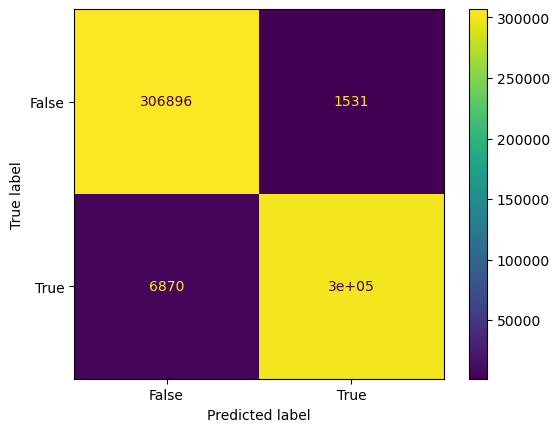

In [12]:
print(metrics.classification_report(results.Actual_Output, results.Random_Forest_Output))

confusion_matrix = metrics.confusion_matrix(results.Actual_Output, results.Random_Forest_Output)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [26]:
print(metrics.accuracy_score(results.Actual_Output, results.Random_Forest_Output))

0.9863766315690469


## COMBINED MODEL

In [13]:
sirs= list(results.SIRS_Output)
rf = list(results.Random_Forest_Output)
dt = list(results.IMP_Decision_Tree_Output)
#sofa = list(results.SOFA_Output)

In [14]:
count = []
for j in range(0,len(y_test)):
    temp = rf[j] + dt[j] + sirs[j]
    if(temp>=2):
        count.append(1)
    else:
        count.append(0)
results['Output1'] = count
results

,O2Sat,SBP,DBP,EtCO2,Temp,HR,Resp,PaCO2,SaO2,FiO2,Platelets,Bilirubin_direct,MAP,Creatinine,Age,Actual_Output,SIRS_Output,IMP_Decision_Tree_Output,Random_Forest_Output,Output1
499008,97.000000,113.000000,51.000000,33.385834,37.003726,80.000000,23.000000,41.129295,91.820606,0.559317,197.613414,2.427547,71.000000,1.459667,77.16,0,1,0,0,0
1006910,99.000000,154.000000,82.000000,33.385834,37.003726,94.000000,12.000000,41.129295,91.820606,0.559317,197.613414,2.427547,103.000000,1.459667,87.00,0,1,0,0,0
459829,100.000000,138.000000,62.218458,33.385834,37.003726,72.000000,36.000000,41.129295,91.820606,0.559317,197.613414,2.427547,77.000000,1.459667,87.58,0,1,0,0,0
920753,97.228627,122.392746,62.218458,33.385834,37.003726,84.870313,18.754969,41.129295,91.820606,0.559317,197.613414,2.427547,80.578177,1.459667,78.00,0,0,0,0,0
375141,100.000000,124.000000,67.000000,33.385834,37.830000,107.000000,14.500000,41.129295,91.820606,0.500000,197.613414,2.427547,88.000000,1.459667,63.34,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894274,98.000000,238.000000,138.000000,33.385834,37.003726,76.000000,20.000000,41.129295,91.820606,0.559317,197.613414,2.427547,164.000000,1.459667,28.00,0,0,0,0,0
558601,96.000000,122.392746,62.218458,33.385834,37.003726,48.000000,11.000000,41.129295,91.820606,0.559317,197.613414,2.427547,86.000000,1.459667,73.88,0,0,0,0,0
863494,96.000000,142.000000,58.000000,33.385834,37.003726,74.000000,22.000000,41.129295,91.820606,0.559317,197.613414,2.427547,88.000000,1.459667,77.00,0,1,0,0,0
1674463,98.019650,133.983139,71.860610,33.385834,37.003726,63.139693,19.681188,40.521538,91.820606,0.530969,197.613414,2.427547,87.691530,1.585350,82.74,1,0,1,1,1


              precision    recall  f1-score   support

           0       0.98      0.98      0.98    308427
           1       0.98      0.98      0.98    308234

    accuracy                           0.98    616661
   macro avg       0.98      0.98      0.98    616661
weighted avg       0.98      0.98      0.98    616661



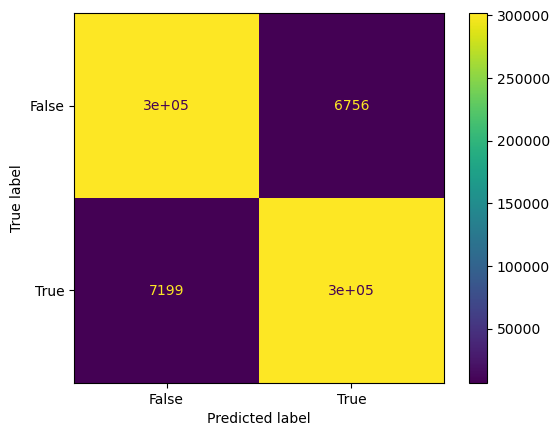

In [15]:
print(metrics.classification_report(results.Actual_Output, results.Output1))

confusion_matrix = metrics.confusion_matrix(results.Actual_Output, results.Output1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [65]:
print(metrics.accuracy_score(results.Actual_Output, results.Output1))

0.9773700623194916


## For blending using lr

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     94297
           1       0.98      0.99      0.99     90702

    accuracy                           0.99    184999
   macro avg       0.99      0.99      0.99    184999
weighted avg       0.99      0.99      0.99    184999



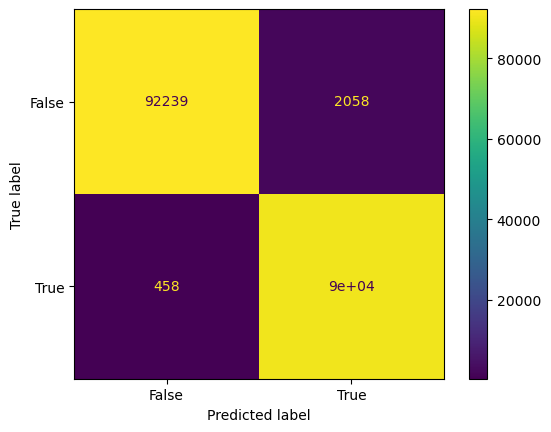

0.9863999264860891


In [66]:
from sklearn.linear_model import LogisticRegression

Output_x= results.loc[:,['SIRS_Output','Random_Forest_Output','IMP_Decision_Tree_Output']]
Output_y = results.Actual_Output   
x_val, x_test1, y_val, y_test1 = train_test_split(Output_x, Output_y, test_size = 0.3, random_state = 42)
model = LogisticRegression()
model.fit(x_val,y_val)
y_pred1= model.predict(x_test1)
print(metrics.classification_report(y_pred1, y_test1))

confusion_matrix = metrics.confusion_matrix(y_pred1, y_test1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print(metrics.accuracy_score(y_test1, y_pred1))

## SOFA

In [36]:
import warnings
warnings.filterwarnings('ignore') 
results = results.assign(SOFA_Output=1)

for j in range(0,len(y_test)):
    tally = 0   
    if(FiO2[j]!=0):
        #For criteria 1
        c1 = SaO2[j]/FiO2[j]
        if(c1>300):
            tally +=0
        elif(c1>=221):
            tally +=1
        elif(c1>=142):
            tally +=2
        elif(c1>=67):
            tally +=3
        else:
            tally +=4

        #For criteria 2
        c2=Platelets[j]
        if(c2>=150):
            tally +=0
        elif(c2>=100):
            tally +=1
        elif(c2>=50):
            tally +=2
        elif(c2>=20):
            tally +=3
        else:
            tally +=4

        #For criteria 3
        c3=Bilirubin_direct[j]
        if(c3<1.2):
            tally +=0
        elif(c3<=1.9):
            tally +=1
        elif(c3<=5.9):
            tally +=2
        elif(c3<=11.9):
            tally +=3
        else:
            tally +=4

        #For criteria 4
        c4=MAP[j]
        if(c4>70):
            tally +=0
        else:
            tally +=1

        #For criteria 6
        c6=Creatinine[j]
        if(c6<1.2):
            tally +=0
        elif(c6<=1.9):
            tally +=1
        elif(c6<=3.4):
            tally +=2
        elif(c6<=4.9):
            tally +=3
        else:
            tally +=4
        
        if(tally>=7):
            results.SOFA_Output[j]=1
        else:
            results.SOFA_Output[j]=0

In [37]:
results

,O2Sat,SBP,DBP,EtCO2,Temp,HR,Resp,PaCO2,SaO2,FiO2,...,Creatinine,Age,Actual_Output,SIRS_Output,IMP_Decision_Tree_Output,Random_Forest_Output,Output1,SOFA_Output,Output2,SOFA_Output2
499008,97.000000,113.000000,51.000000,33.385834,37.003726,80.000000,23.000000,41.129295,91.820606,0.559317,...,1.459667,77.16,0,1,0,0,0,0,0,0
1006910,99.000000,154.000000,82.000000,33.385834,37.003726,94.000000,12.000000,41.129295,91.820606,0.559317,...,1.459667,87.00,0,1,0,0,0,1,0,1
459829,100.000000,138.000000,62.218458,33.385834,37.003726,72.000000,36.000000,41.129295,91.820606,0.559317,...,1.459667,87.58,0,1,0,0,0,0,0,0
920753,97.228627,122.392746,62.218458,33.385834,37.003726,84.870313,18.754969,41.129295,91.820606,0.559317,...,1.459667,78.00,0,0,0,0,0,1,0,1
375141,100.000000,124.000000,67.000000,33.385834,37.830000,107.000000,14.500000,41.129295,91.820606,0.500000,...,1.459667,63.34,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894274,98.000000,238.000000,138.000000,33.385834,37.003726,76.000000,20.000000,41.129295,91.820606,0.559317,...,1.459667,28.00,0,0,0,0,0,1,0,1
558601,96.000000,122.392746,62.218458,33.385834,37.003726,48.000000,11.000000,41.129295,91.820606,0.559317,...,1.459667,73.88,0,0,0,0,0,0,0,0
863494,96.000000,142.000000,58.000000,33.385834,37.003726,74.000000,22.000000,41.129295,91.820606,0.559317,...,1.459667,77.00,0,1,0,0,0,1,0,1
1674463,98.019650,133.983139,71.860610,33.385834,37.003726,63.139693,19.681188,40.521538,91.820606,0.530969,...,1.585350,82.74,1,0,1,1,1,1,1,1


In [71]:
#Saving the results in CSV file
results.to_csv('Results.csv')

              precision    recall  f1-score   support

           0       0.98      0.57      0.72    308427
           1       0.70      0.99      0.82    308234

    accuracy                           0.78    616661
   macro avg       0.84      0.78      0.77    616661
weighted avg       0.84      0.78      0.77    616661



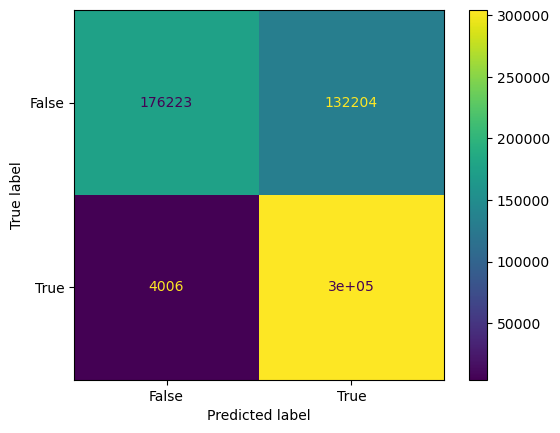

In [38]:
print(metrics.classification_report(results.Actual_Output, results.SOFA_Output))

confusion_matrix = metrics.confusion_matrix(results.Actual_Output, results.SOFA_Output)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [39]:
sofa = list(results.SOFA_Output)
count = []
for j in range(0,len(y_test)):
    temp = rf[j] + dt[j] + sirs[j] + sofa[j]
    if(temp>=2):
        count.append(1)
    else:
        count.append(0)
results['Output2'] = count
results

,O2Sat,SBP,DBP,EtCO2,Temp,HR,Resp,PaCO2,SaO2,FiO2,...,Creatinine,Age,Actual_Output,SIRS_Output,IMP_Decision_Tree_Output,Random_Forest_Output,Output1,SOFA_Output,Output2,SOFA_Output2
499008,97.000000,113.000000,51.000000,33.385834,37.003726,80.000000,23.000000,41.129295,91.820606,0.559317,...,1.459667,77.16,0,1,0,0,0,0,0,0
1006910,99.000000,154.000000,82.000000,33.385834,37.003726,94.000000,12.000000,41.129295,91.820606,0.559317,...,1.459667,87.00,0,1,0,0,0,1,1,1
459829,100.000000,138.000000,62.218458,33.385834,37.003726,72.000000,36.000000,41.129295,91.820606,0.559317,...,1.459667,87.58,0,1,0,0,0,0,0,0
920753,97.228627,122.392746,62.218458,33.385834,37.003726,84.870313,18.754969,41.129295,91.820606,0.559317,...,1.459667,78.00,0,0,0,0,0,1,0,1
375141,100.000000,124.000000,67.000000,33.385834,37.830000,107.000000,14.500000,41.129295,91.820606,0.500000,...,1.459667,63.34,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894274,98.000000,238.000000,138.000000,33.385834,37.003726,76.000000,20.000000,41.129295,91.820606,0.559317,...,1.459667,28.00,0,0,0,0,0,1,0,1
558601,96.000000,122.392746,62.218458,33.385834,37.003726,48.000000,11.000000,41.129295,91.820606,0.559317,...,1.459667,73.88,0,0,0,0,0,0,0,0
863494,96.000000,142.000000,58.000000,33.385834,37.003726,74.000000,22.000000,41.129295,91.820606,0.559317,...,1.459667,77.00,0,1,0,0,0,1,1,1
1674463,98.019650,133.983139,71.860610,33.385834,37.003726,63.139693,19.681188,40.521538,91.820606,0.530969,...,1.585350,82.74,1,0,1,1,1,1,1,1


              precision    recall  f1-score   support

           0       0.98      0.78      0.87    308427
           1       0.82      0.98      0.89    308234

    accuracy                           0.88    616661
   macro avg       0.90      0.88      0.88    616661
weighted avg       0.90      0.88      0.88    616661



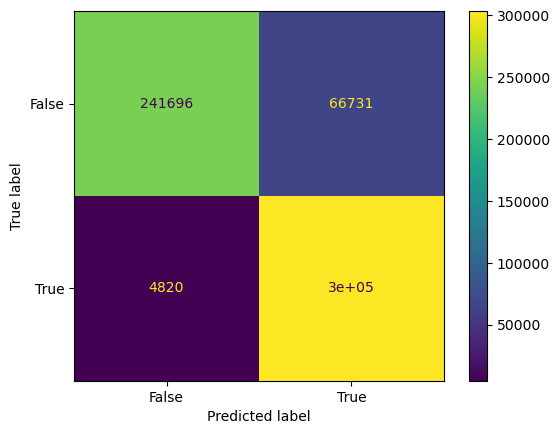

In [40]:
print(metrics.classification_report(results.Actual_Output, results.Output2))

confusion_matrix = metrics.confusion_matrix(results.Actual_Output, results.Output2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     94297
           1       0.98      0.99      0.99     90702

    accuracy                           0.99    184999
   macro avg       0.99      0.99      0.99    184999
weighted avg       0.99      0.99      0.99    184999



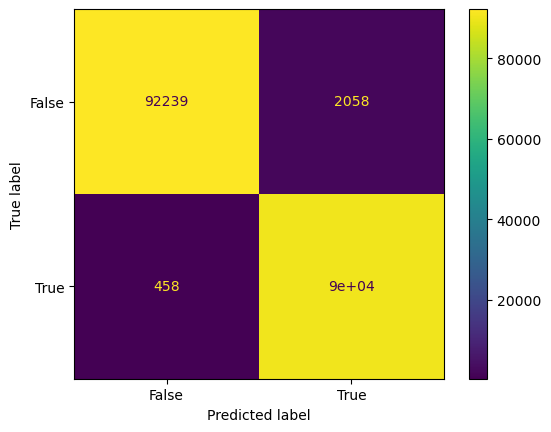

0.9863999264860891


In [67]:
from sklearn.linear_model import LogisticRegression

Output_x= results.loc[:,['SIRS_Output','Random_Forest_Output','IMP_Decision_Tree_Output','SOFA_Output']]
Output_y = results.Actual_Output   
x_val, x_test1, y_val, y_test1 = train_test_split(Output_x, Output_y, test_size = 0.3, random_state = 42)
model = LogisticRegression()
model.fit(x_val,y_val)
y_pred1= model.predict(x_test1)
print(metrics.classification_report(y_pred1, y_test1))

confusion_matrix = metrics.confusion_matrix(y_pred1, y_test1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print(metrics.accuracy_score(y_test1, y_pred1))

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc = roc_auc_score(y_test1, y_pred1)
roc_auc

0.9863813981676725

In [58]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
roc_auc = roc_auc_score(y_test1, y_pred1)
roc_auc

0.9863813981676725

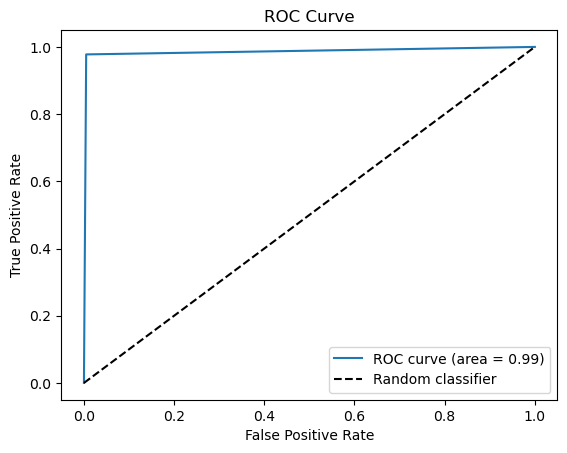

In [59]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [49]:
fpr, tpr, thresholds = roc_curve(results.Actual_Output, results.SIRS_Output)
roc_auc = roc_auc_score(results.Actual_Output, results.SIRS_Output)
roc_auc

0.595071380123348

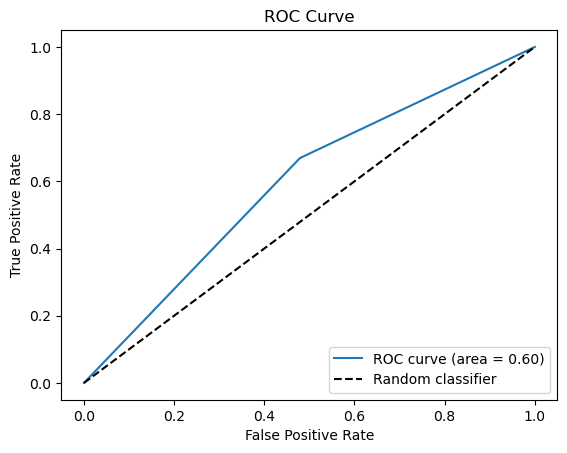

In [51]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
fpr, tpr, thresholds = roc_curve(results.Actual_Output, results.IMP_Decision_Tree_Output)
roc_auc = roc_auc_score(results.Actual_Output, results.IMP_Decision_Tree_Output)
roc_auc

0.9717921897257769

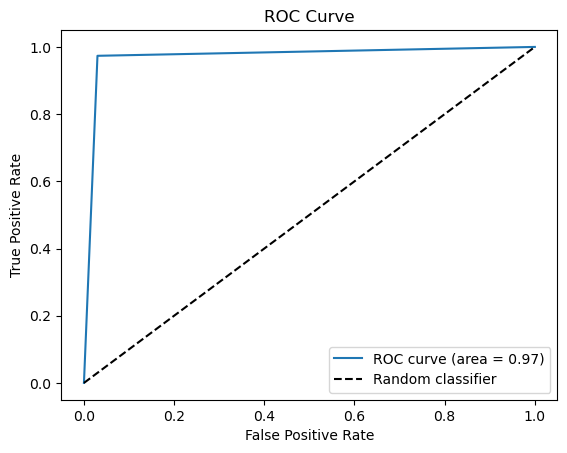

In [53]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [56]:
fpr, tpr, thresholds = roc_curve(results.Actual_Output, results.SOFA_Output)
roc_auc = roc_auc_score(results.Actual_Output, results.SOFA_Output)
roc_auc

0.7791819322764315

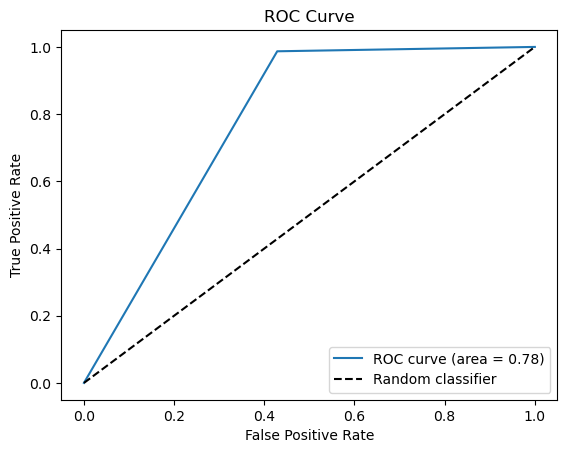

In [57]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()